In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import seed 
from numpy.random import randint 
from math import sqrt,exp,pi

In [2]:
def bilateral_filt(img1,sig_domain,sig_range,k):
    var_domain=sig_domain**2
    var_range=sig_range**2
    img=np.copy(img1)
    img = img.astype('float32')
    out_img=np.zeros_like(img)
    row,col=img.shape
    img_pad= np.zeros((row+ k-1,col + k-1))
    u= int(k/2)
    img_pad[u:-u, u:-u] = img
    dom = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            dom[i,j] = np.exp(-((i-u)**2 + (j-u)**2)/(2*var_domain))
    for i in range(row):
        for j in range(col):
            range_img = img_pad[i:i+k,j:j+k]
            center_pixel = img_pad[i+u,j+u]
            sub = range_img-center_pixel
            ran = np.exp(-1*((sub**2)/(2*(var_range))))
            kernel=np.multiply(dom,ran)
            out_img[i,j]= np.sum(np.multiply(range_img,kernel))
            out_img[i,j] = out_img[i,j]/np.sum(kernel)
    return out_img

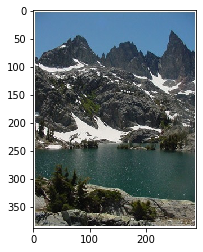

In [3]:
mon=cv.imread('../images/mountain.jpg',1)
mon=cv.cvtColor(mon,cv.COLOR_BGR2RGB)
plt.imshow(mon)

In [4]:
def bilfilt_3D(img, sig1, sig2, k):
    out_img=np.zeros(img.shape)
    if (len(img.shape)==2):
        out_img = bilateral_filt(img, sig1, sig2, k)
    elif (len(img.shape)==3):
        out_img[:,:,0] = bilateral_filt(img[:,:,0],sig1,sig2,k)
        out_img[:,:,1] = bilateral_filt(img[:,:,1],sig1,sig2,k)
        out_img[:,:,2] = bilateral_filt(img[:,:,2],sig1,sig2,k)
    return out_img

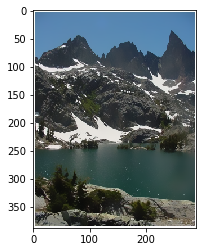

In [5]:
o1= bilfilt_3D(mon,14,14,15)
plt.imshow(o1.astype(np.uint8))

In [6]:
# bil_c=cv.bilateralFilter(mon,15,9,9)
# plt.imshow(bil_c)

Text(0.5, 1.0, 'Bilateral Filtered Image')

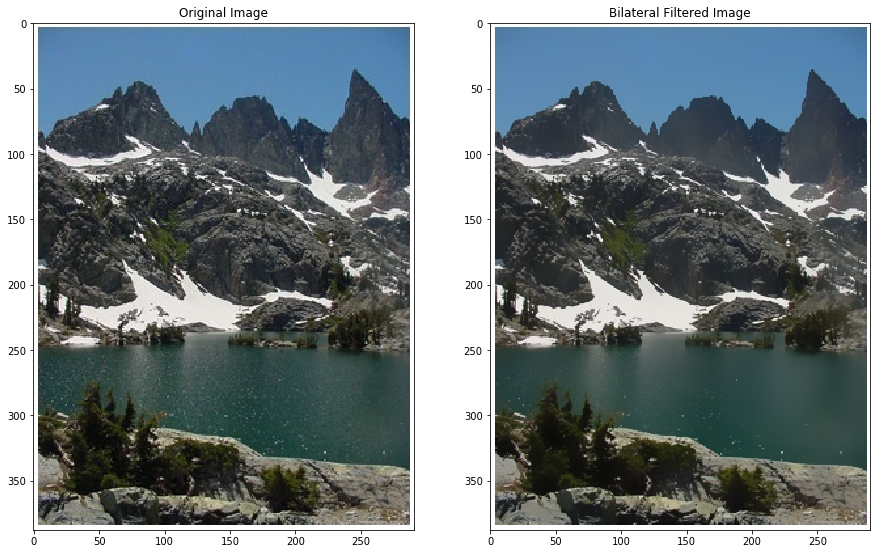

In [7]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(mon)
axarr[1].imshow(o1.astype(np.uint8))
axarr[0].set_title("Original Image")
axarr[1].set_title("Bilateral Filtered Image")

In [8]:
# bilateral = cv.bilateralFilter(mon, 9,9,5) 

In [9]:
def cross_bilateral_filt(img1, img2, sig_domain, sig_range, k):
    
    var_domain=sig_domain**2
    var_range=sig_range**2
    
    img=np.copy(img1)
    img_n=np.copy(img2)
    
    img = img.astype('float32')
    img_n = img_n.astype('float32')
    
    out_img=np.zeros_like(img)
    row,col=img.shape
    
    img_pad= np.zeros((row+ k-1,col + k-1))
    img_pad_n=np.zeros((row+ k-1,col + k-1))
    
    u= int(k/2)
    
    img_pad[u:-u, u:-u] = img
    img_pad_n[u:-u,u:-u] = img_n
    
    dom = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            dom[i,j] = np.exp(-((i-u)**2 + (j-u)**2)/(2*var_domain))
    for i in range(row):
        for j in range(col):
            range_img = img_pad[i:i+k,j:j+k]
            center_pixel = img_pad[i+u,j+u]
            sub = range_img-center_pixel
            ran = np.exp(-1*((sub**2)/(2*(var_range))))
            kernel=np.multiply(dom,ran)
            out_img[i,j]= np.sum(np.multiply(img_pad_n[i:i+k,j:j+k],kernel))
            out_img[i,j] = out_img[i,j]/np.sum(kernel)
    return out_img

In [10]:
def cross_bilfilt_3D(img1,img2,sig1, sig2, k):
    out_img=np.zeros(img1.shape)
    if (len(img1.shape)==2):
        out_img = bilateral_filt(img1, img2,sig1, sig2, k)
    elif (len(img1.shape)==3):
        out_img[:,:,0] = cross_bilateral_filt(img1[:,:,0],img2[:,:,0],sig1,sig2,k)
        out_img[:,:,1] = cross_bilateral_filt(img1[:,:,1],img2[:,:,1],sig1,sig2,k)
        out_img[:,:,2] = cross_bilateral_filt(img1[:,:,2],img2[:,:,1],sig1,sig2,k)
    return out_img        
# out_img[:,:,2] = cross_bilateral_filt(img1[:,:,2]/(img1[:,:,2].max()),img2[:,:,1]/(img2[:,:,2].max()),sig1,sig2,k)

In [17]:
c_flash=cv.imread('../images/cake_flash.jpg',1)
c_flash=cv.cvtColor(c_flash,cv.COLOR_BGR2RGB)
c_noflash=cv.imread('../images/cake_noflash.jpg',1)
c_noflash=cv.cvtColor(c_noflash,cv.COLOR_BGR2RGB)

In [33]:
out1=cross_bilfilt_3D(c_flash,c_noflash,50,50,15)

Text(0.5, 1.0, 'Cross Bilateral Output')

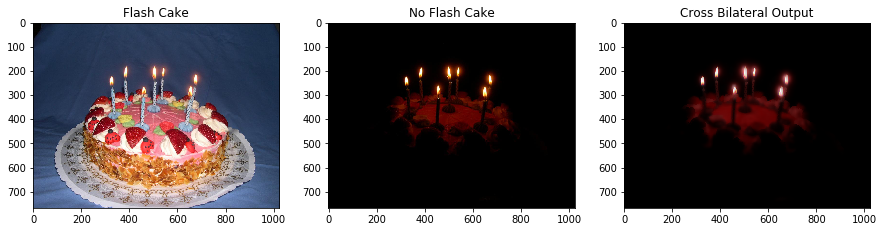

In [34]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(c_flash)
axarr[1].imshow(c_noflash)
axarr[2].imshow(out1.astype(np.uint8))
axarr[0].set_title("Flash Cake")
axarr[1].set_title("No Flash Cake")
axarr[2].set_title("Cross Bilateral Output")

Cross Bilateral Output and No flash outputs are different and they are not close which can be seen below by using np.close function. 

In [36]:
np.allclose(out1.astype(np.uint8),c_noflash)

False